<a href="https://colab.research.google.com/github/DomMc97/Car_Data/blob/master/SVM/SVM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM Classification

A classification of the quality of car from a set of descriptors using SVM classification for a variety of kernel functions.

The data set contains a record of the rating of a series of cars by a car dealer into the following categories: 'unacceptable', 'acceptable', 'good', or 'very good' this is the target. The data set also contains the following descriptors for each car:

* buying: buying price
* maint: price of the maintenance
* doors: number of doors
* persons: capacity in terms of persons to carry
* lug_boot: the size of luggage boot
* safety: estimated safety of the car

---



## Set up

Import Libraries

In [1]:
# scientific library
import numpy as np

# data analytics library
import pandas as pd

# sklearn functions
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #sets design of figures

# libraries for saving/loading data
import pickle
from google.colab import drive

Mount Google Drive.

In [90]:
# mount drive
drive.mount('/content/drive')

# root of all file paths used in notebook
root = '/content/drive/My Drive/Methods for Data Science/CW2/Data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Asks user whether this is the first run of the code to avoid repeat computations.

In [91]:
# code reapeats until a valid input is inserted for the question.
while True:
    init_run = input('Is this the first run of the code y/n?\n')

    if init_run == 'y':
        init_run = True
        break
    elif init_run == 'n':
        init_run = False
        break
    else:
        print('Invalid input.\n')

Is this the first run of the code y/n?
n


Importation of processed data.

In [92]:
# upload files
X_train = np.load(root + 'X_train.npy')
y_train = np.load(root + 'y_train.npy')

## Overview of Support Vector Machines

<u> SVM </u>

Denote the classification problem as geometric seperation problem where a set of data points $\vec{x}^{(i)} = (x_{1}^{(i)} ... x_{p}^{i})$ belongs to binary classes $y \in {-1, 1}$. The idea being we can split the feature space into 2 regions (one for each class) with a hyperplane.


![](https://66.media.tumblr.com/ff709fe1c77091952fb3e3e6af91e302/tumblr_inline_o9aa8dYRkB1u37g00_540.png)

The hyperplane can be written as the p dimensional plane $\vec{x} \cdot \vec{w} + b = 0$ we would like to find $\vec{w}, b$ which provides the best seperation of the plane.

The best seperation is the the line for which the distance between the closest point to line in each region is as large as possible. This is the line half way between the margin lines which maximises the width of the margin between support vectors.


![](https://scikit-learn.org/stable/_images/sphx_glr_plot_separating_hyperplane_0011.png)


The margin lines are $\vec{x_{\pm}} \cdot \vec{w} + b = \pm c_{1}$. The margin width is therefore $\vec{x_{+}} - \vec{x_{-}} \cdot \frac{\vec{w}}{||\vec{w}||} = \frac{2 c_{1}}{||w||}$ which is converted to the following optimisation problem to maximise the width. $$\min{\frac{1}{2} ||w||^{2}} \text{ subject to } y^{(i)}(\vec{x^{(i)}} \cdot \vec{w} + b ) \geq 1 $$ The condition enforces that all binary points are the 'right' side of the margin lines.

<u> Soft Margin SVM </u>

To allow for violations when the feature space is not linearly seperable we introduce a soft margin. To do this we add a Hinge loss as a cost for a violation.

The Hinge loss is: $\xi^{(i)} = \max(0, 1 - y^{(i)}(\vec{x^{(i)}} \cdot \vec{w} + b ))$ which is positive only when a point is the wrong side of the margin.

The new problem becomes: $$\min{\frac{1}{2} ||w||^{2}} + \lambda \sum\limits_{i = 1}^{N} \xi^{(i)} \text{ subject to } 1- y^{(i)}(\vec{x^{(i)}} \cdot \vec{w} + b ) \leq \xi^{(i)} $$

<u> Kernalised SVM </u>

Where a linear separation does not exist in the dimension of the feature space a Kernel function can be used to project the feature space into a higher dimensional space where a seperating hyperplane exists. 

![](https://www.eric-kim.net/eric-kim-net/posts/1/imgs/data_2d_to_3d_hyperplane.png)

A kernel function is of the following form $K(\vec{x}, \vec{y}) = \phi(\vec{x}) \cdot \phi(\vec{y})$  where $\phi$ is a vector function e.g $\phi(\vec{x} = (x_{1}, x_{2})) = (x_{1}^{2}, x_{2}^{2}, \sqrt{2} x_{1}x_{2})$. 

In the optimisation we replace $\vec{x^{(i)}} \cdot \vec{w}$ with $K(\vec{x^{(i)}}, \vec{w})$.

<u> Multiclass SVM </u>

To extend to the case of multiple classes, multiple decision boundaries are instead found each created with a one vs rest approach to recast the problem into a set of binary SVM classifications.

## Linear SVM

The first SVM classification I will train is a SVM with a linear Kernel and a soft margin. This assumes that the feature space can be suitably seperated with a set of hyperplanes.

The only hyperparameter to be optimised is the penalty parameter for violations $\lambda$ this controls the balance between having a large margin and having few violations.



---



Function for Lin_SVM optimisation of the penalty parameter.

In [93]:
def Lin_SVM(C, fig_num, log=False):
    """ A function which runs 5-fold cross-validation of the accuracy of a 
    Linear SVM model for a range of penalty parameters and displays results.
    Inputs:
        C: array of penalty parameters.
        fig_num: a figure number string.
        log: whether x-axis is log.
    Output:
      CV: Results of CV.
    """   

    # Linear SVM classifier
    SVM = SVC(kernel='linear')

    # hyperparameters
    params = {'C' : C}

    if init_run:
        # grid search of parameters
        CV = GridSearchCV(SVM, params, scoring='accuracy',verbose=2, 
                            cv=StratifiedKFold(shuffle=True, random_state=0))
        CV.fit(X_train, y_train)

        # save results
        with open(root + 'Linear_SVM_CV_' + fig_num + '.sav', 'wb') as fp:
            pickle.dump(CV, fp)
    else:
        # load fitted grid search
        CV = pickle.load(open(root + 'Linear_SVM_CV_' + fig_num + '.sav', 'rb'))
  
    # print results
    print('Best Score: ', CV.best_score_, '\nBest Parameters: ',
          CV.best_params_)

    # create figure
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)

    if log:
        # log x axis
        ax.set_xscale('log')

    # make plot
    ax.set_title('Penalty Parameter vs Accuracy for Linear SVM (Fig.' + fig_num\
                 + ')', fontsize=15, y=1.02)
    plt.plot(C, CV.cv_results_['mean_test_score'], marker='o',
             markerfacecolor='r', linestyle='dashed')
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Penalty Parameter')

    plt.show()

    return CV


Wide log range search to identify a sensible scale for the penalty parameter using 5-fold cross-validation. 

Best Score:  0.3512455516014235 
Best Parameters:  {'C': 0.001953125}


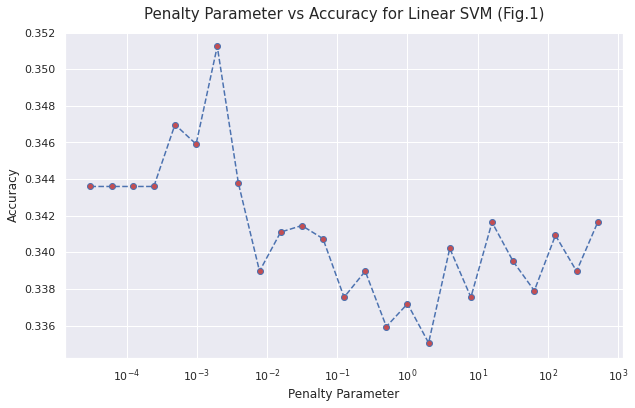

In [94]:
# log range of the penalty parameter
C = 2.0**np.arange(-15,10)

# 5-fold CV to find optimum penalty paramater
_ = Lin_SVM(C, '1', True)

We can see the region around $2^{-9}$ has the highest accuracy so I will fine tune my search around $2^{-9}$.

Best Score:  0.35142348754448405 
Best Parameters:  {'C': 0.0020000000000000005}


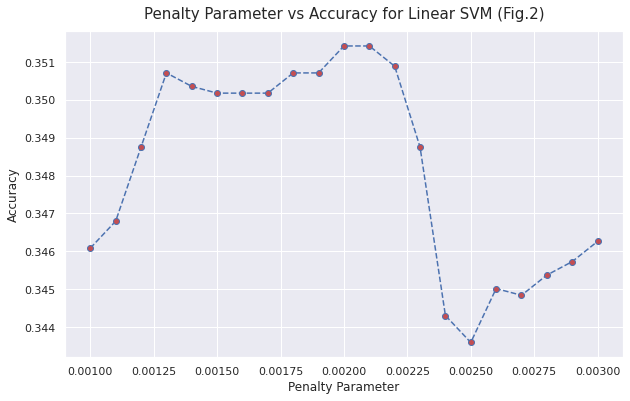

In [95]:
# range of the penalty parameter
C = np.arange(1e-3, 3.1e-3, 1e-4)

# 5-fold CV to find optimum penalty paramater
_ = Lin_SVM(C, '2')

I will finally search around 0.002. 

Best Score:  0.3519572953736655 
Best Parameters:  {'C': 0.0021200000000000004}


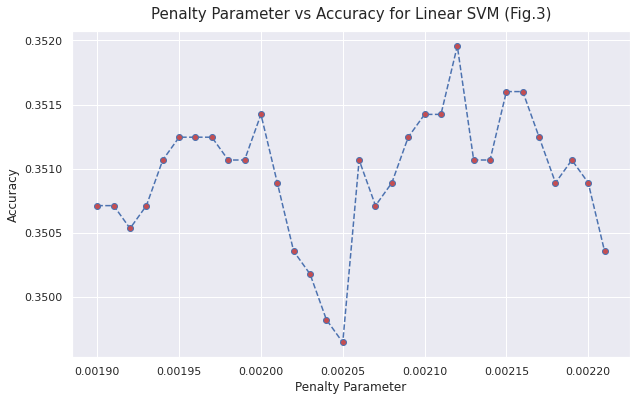

In [96]:
# range of the penalty parameter
C = np.arange(1.9e-3, 2.21e-3, 1e-5)

# 5-fold CV to find optimum penalty paramater
Lin_CV = Lin_SVM(C, '3')

# optimum trained model 
Linear_SVM = Lin_CV.best_estimator_

# save best model
with open(root + 'Linear_SVM.sav', "wb") as fp:
    pickle.dump(Linear_SVM, fp)

# add best score to best scores array
best_scores = [Lin_CV.best_score_] 

The best linear SVM model is seen to be the one with C=0.00212

## Polynomial SVM

The Polynomial kernel is the function $K(\vec{x}, \vec{y}) = (\gamma (\vec{x} \cdot \vec{y}) + a)^{d}$ this introduces a non-linear decsion boundary which allows for the non-linear seperations of the feature space.

The hyparameters are $d$: the degree of the polynomial, $a$: a scalar coefficient of the  polynomial kernel, $\gamma$: a control of the convexity of the polynomial, and $C$: the penalty parameter which is as for the Linear SVM.



---



A function which visualises the cross-validation of the accuracy of the polynomial SVM.

In [97]:
def Poly_SVM(d, a , C, fig_num = None):
    """ A function which runs 5-fold cross-validation of the accuracy of a 
    Polynomial SVM model for a range of penalty parameters, degree and coeff 
    and displays the result.
    Inputs:
        d: degree of polynomial kernel.
        a: coefficient of polynomial kernel.
        C: array of penalty parameters.
    Output:
      CV: Results of CV.
    """   

    # Linear SVM classifier
    SVM = SVC(kernel='poly', gamma='auto')

    # hyperparameters
    params = {'degree' : d, 'C' : C, 'coef0' : a}

    if init_run:
        # grid search of parameters
        CV = GridSearchCV(SVM, params, scoring='accuracy',verbose=2, 
                            cv=StratifiedKFold(shuffle=True, random_state=0))
        CV.fit(X_train, y_train)

        # save results
        with open(root + 'Poly_SVM_CV_' + fig_num + '.sav', 'wb') as fp:
            pickle.dump(CV, fp)
    else:
        # load fitted grid search
        CV = pickle.load(open(root + 'Poly_SVM_CV_' + fig_num + '.sav', 'rb'))
  
    # print results
    print('Best Score: ', CV.best_score_, '\nBest Parameters: ',
          CV.best_params_)

      # length of paramas
    N, M, K = len(C), len(a), len(d)

    # gets a 3D grid of results
    scores = CV.cv_results_['mean_test_score']
    grid = scores.reshape(N, M, K)

    # min and max scores
    vmin = min(scores)
    vmax = max(scores)

    # create figure
    fig, axs = plt.subplots(1, K, figsize = (K*N/2, M*1.2), sharey=True)
    cbar_ax = fig.add_axes([.91, .15, .03, .75])

    # title
    fig.suptitle('Polynomial SVM Accuracy Optimisation (Fig.' + fig_num + ')',
                 fontsize='15', y=1.06)
    for i, ax in enumerate(axs):
        # 2D grid
        data = grid[:, :, i]
        
        # z-axis
        ax.set_title('Degree: ' +  str(d[i]))
        
        # makes plots
        if i != 0:
            sns.heatmap(data, vmin=vmin, vmax=vmax, ax=ax, yticklabels=C, 
                        xticklabels=a,cbar=False)
        else:
            sns.heatmap(data, vmin=vmin, vmax=vmax, ax=ax, yticklabels=C, 
                        xticklabels=a, cbar_ax = cbar_ax, 
                        cbar_kws={'label': 'Accuracy'})
            ax.set_ylabel('Coefficent')
        # sets x label
        ax.set_xlabel('C')

    return CV

I will start with a coarse grid search of the parameters of $d, a$ & $C$ I will leave $\gamma$ out of the grid search to reduce computational cost. I leave $\gamma$ out as it is merely a control of polynomial convexity only slightly adjusting the decision boundary shape and hence will only have a minor impact on accuracy in comparision to the other hyperparametres. 

The ranges I will search are:



*   **Degree:** I will search for a range of 1 to 6. This is a range which searchs a variety of low degree since for high degrees there is a risk at overfitting. 
*   **Coeffient:** I will search 0, 0.5 and 1 to control the seperation of values with mod less than 1.
* **Penalty Parameter:** The penalty parameter controls the softness of the margin I will search a wide log range (but not as wide as for the linear range to reduce computation time).
 



Best Score:  0.40142348754448404 
Best Parameters:  {'C': 1.0, 'coef0': 1.0, 'degree': 5}


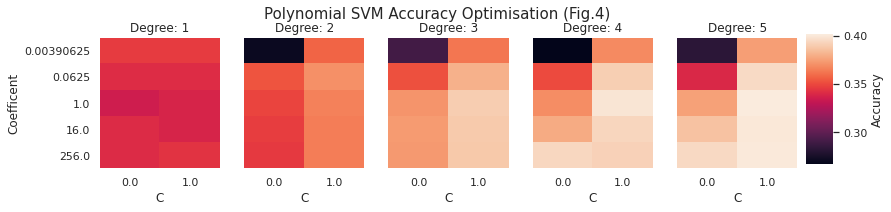

In [98]:
# range of degrees
d = np.arange(1,6)

# range of coefficient a
a = [0.0, 1.0]

# log range of the penalty parameter
C = 2.0**np.arange(-8,9,4)

# 5-fold CV to find optimum hyperparamaters
_ = Poly_SVM(d, a, C, fig_num='4')

I will now refine my search around the optimum parameters.

Best Score:  0.40533807829181495 
Best Parameters:  {'C': 0.5, 'coef0': 1.0, 'degree': 6}


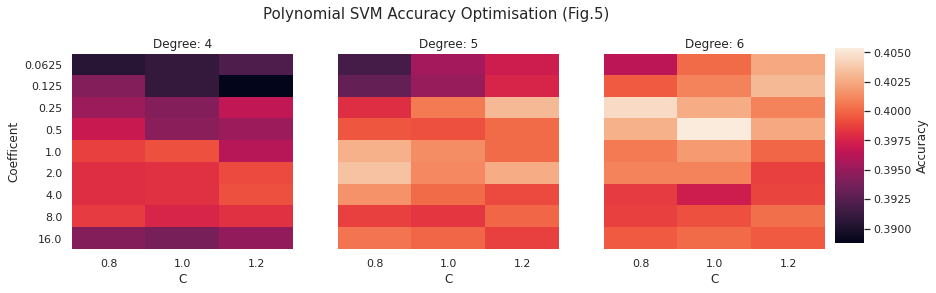

In [99]:
# range of degrees
d = np.arange(4,7)

# range of coefficient a
a = [0.8, 1.0, 1.2]

# log range of the penalty parameter
C = 2.0**np.arange(-4,5,1) 

# 5-fold CV to find optimum hyperparamaters
_ = Poly_SVM(d, a, C, fig_num='5')

The best hyperparameters are $d=6$, $C=0.5$ and $a=1$. I will now write a function for optimisation of $\gamma$ for these values.

In [100]:
def Poly_SVM_Gamma(gamma, fig_num, log=False):
    """ A function which runs 5-fold cross-validation of the accuracy of a 
    Polynomial SVM model for a range of penalty parameters and displays results.
    Inputs:
        C: array of penalty parameters.
        fig_num: a figure number string.
        log: whether x-axis is log.
    Output:
      CV: Results of CV.
    """   

    # Linear SVM classifier
    SVM = SVC(kernel='poly',C=0.5 , degree=6, coef0=1.0)

    # hyperparameters
    params = {'gamma' : gamma}

    if init_run:
        # grid search of parameters
        CV = GridSearchCV(SVM, params, scoring='accuracy',verbose=2, 
                            cv=StratifiedKFold(shuffle=True, random_state=0))
        CV.fit(X_train, y_train)

        # save results
        with open(root + 'Linear_SVM_CV_' + fig_num + '.sav', 'wb') as fp:
            pickle.dump(CV, fp)
    else:
        # load fitted grid search
        CV = pickle.load(open(root + 'Linear_SVM_CV_' + fig_num + '.sav', 'rb'))
  
    # print results
    print('Best Score: ', CV.best_score_, '\nBest Parameters: ',
          CV.best_params_)

    # create figure
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)

    if log:
        # log x axis
        ax.set_xscale('log')

    # make plot
    ax.set_title('Gamma vs Accuracy for Polynomial SVM (Fig.' + fig_num\
                 + ')', fontsize=15, y=1.02)
    plt.plot(gamma, CV.cv_results_['mean_test_score'], marker='o',
             markerfacecolor='r', linestyle='dashed')
    ax.set_ylabel('Accuracy')
    ax.set_xlabel(r'$gamma$')

    plt.show()

    return CV

I will finally optimise gamma for the chosen parameters at first at a wide log range.

Best Score:  0.40106761565836296 
Best Parameters:  {'gamma': 0.125}


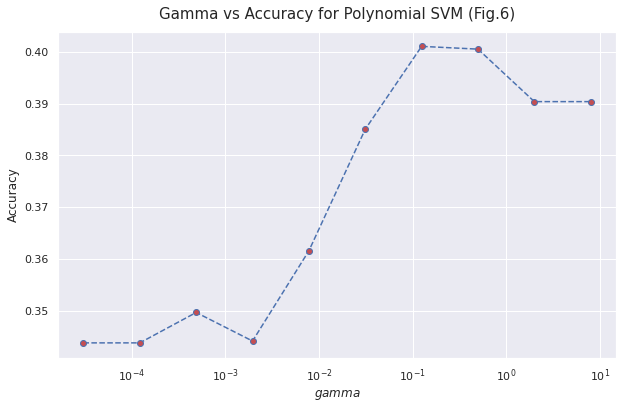

In [101]:
init_run = False
# log range of gamma
gamma = 2.0**np.arange(-15,4,2)

# 5-fold CV to find optimum hyperparamaters
_ = Poly_SVM_Gamma(gamma,log=True, fig_num='6')

'auto' which is 1/6 acheived a higher score than those in the wide range I will therefore optimise around 1\6.

Best Score:  0.40533807829181495 
Best Parameters:  {'gamma': 0.16666666666666666}


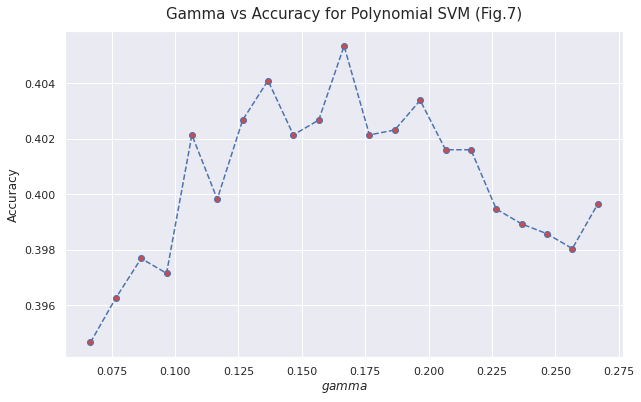

In [102]:
# range of gamma
gamma = 1/6 + np.linspace(-0.1,0.1,21)

# 5-fold CV to find optimum hyperparamaters
Poly_CV = Poly_SVM_Gamma(gamma, fig_num='7')

# optimum trained model 
Polynomial_SVM = Poly_CV.best_estimator_

# save best model
with open(root + 'Poly_SVM.sav', "wb") as fp:
    pickle.dump(Polynomial_SVM, fp)

# add best score to best scores array
best_scores.append(Poly_CV.best_score_) 

The best hyperparametres for the polynomial SVM are $d=6$, $C=0.5$, $\gamma = \frac{1}{6}$ and $a=1$

## Radial Basis Function SVM

The Radial Basis Function (RBF) kernel is the function $K(\vec{x}, \vec{y}) = \exp(-\gamma ||\vec{x} - \vec{y}||^{2})$ this like the polynomial kernel introduces a non-linear decsion boundary which allows for the non-linear seperations of the feature space.

RBF is generally more flexible than the polynomial kernalised SVM, this is a result of the fact that the RBF function spans a function space with much higher cardinality than polynomial and it's homogenity: it only depends on the magnitude between datapoints.

It also captures non-linearity with fewer hyperparamters to choice from allowing easier cross-validation.

The hyparameters are $\gamma$ : a constant which captures the variance of the gaussian, and $C:$ The penalty parameter as before. 

---



A function which visualises the cross-validation of the accuracy of the RBF SVM.

In [103]:
def RBF_SVM(gamma, C, fig_num):
    """ A function which runs 5-fold cross-validation of the accuracy of a 
    RBF SVM model for a range of penalty parameters and gamma
    and displays the result.
    Inputs:
        gamma: array of gamma values.
        C: array of penalty parameters.
    Output:
      CV: Results of CV.
    """   

    # Linear SVM classifier
    SVM = SVC()

    # hyperparameters
    params = {'C' : C , 'gamma' : gamma}

    if init_run:
        # grid search of parameters
        CV = GridSearchCV(SVM, params, scoring='accuracy',verbose=2, 
                            cv=StratifiedKFold(shuffle=True, random_state=0))
        CV.fit(X_train, y_train)

        # save results
        with open(root + 'RBF_SVM_CV_' + fig_num + '.sav', 'wb') as fp:
            pickle.dump(CV, fp)
    else:
        # load fitted grid search
        CV = pickle.load(open(root + 'RBF_SVM_CV_' + fig_num + '.sav', 'rb'))
  
    # print results
    print('Best Score: ', CV.best_score_, '\nBest Parameters: ',
          CV.best_params_)

    # length of paramas
    N, M = len(C), len(gamma)

    # gets a 2D grid of results
    scores = CV.cv_results_['mean_test_score']
    grid = scores.reshape(N, M)

    # min and max scores
    vmin = min(scores)
    vmax = max(scores)
    
    # create fig
    fig, ax = plt.subplots(figsize = (0.7*N, 0.7*M))
    
    # create heat map of CV   
    sns.heatmap(grid, vmin=vmin, vmax=vmax, xticklabels=gamma, yticklabels=C,
                ax=ax)
    # title
    ax.set_title('RBF SVM Accuracy Optimisation (Fig.' + fig_num + ')',
                 fontsize='15', y=1.04)
    
    ax.set_ylabel('Penalty Parameter')
    ax.set_xlabel(r'$gamma$')

    plt.show()
    
    return CV

The ranges of hyperparameters I will search are:

* **Gamma:** The $\gamma$ parameter can be seen as the inverse of the radius of influence of samples selected by the model as support vector. I will search an initial wide log range.
* **Penalty Parameter:** The penalty parameter controls the softness of the margin I will search a wide log range.
 

Best Score:  0.4092526690391459 
Best Parameters:  {'C': 16.0, 'gamma': 0.25}


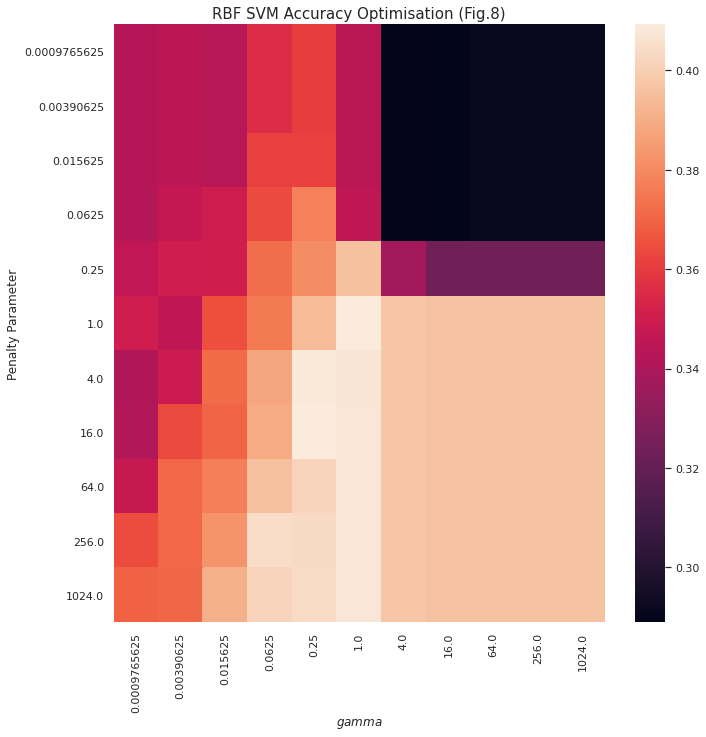

In [104]:
# a log range of gamma
gamma = 2.0**np.arange(-10,11,2)

# log range of the penalty parameter
C = 2.0**np.arange(-10,11,2) 

# 5-fold CV to find optimum hyperparamaters
_ = RBF_SVM(gamma, C, fig_num='8')

I will refine around the central white strip of maximum accuracy. 

Best Score:  0.4112099644128113 
Best Parameters:  {'C': 3, 'gamma': 0.4}


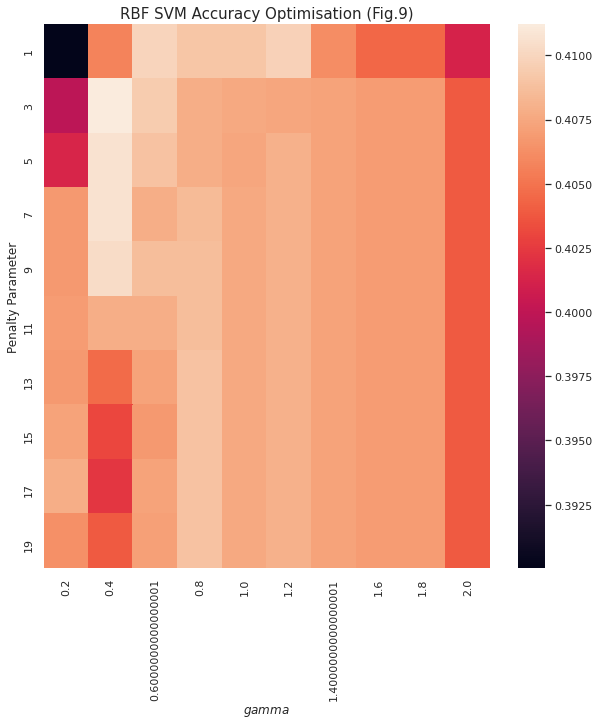

In [105]:
# a range of gamma around 1
gamma = np.arange(0.2, 2.1, 0.2)

# range of the penalty parameter
C = np.arange(1,21,2)

# 5-fold CV to find optimum hyperparamaters
RBF_CV = RBF_SVM(gamma, C, fig_num='9') 

# optimum trained model 
RBF_SVM_model = RBF_CV.best_estimator_

# save best model
with open(root + 'RBF_SVM.sav', "wb") as fp:
    pickle.dump(RBF_SVM_model, fp)

# add best score to best scores array
best_scores.append(RBF_CV.best_score_) 

The optimum parameters were shown to be $C=3$ and $\gamma = 0.4$.

## Discussion

I will choose the best SVM model as the SVM model with an RBF kernel and parameters $C=3$ and $\gamma = 0.4$. This choice is based on the fact that this is the model which returned the highest optimum 5-fold cross validated accuracy of 0.411. 

It is seen in (Fig.10) that both the optimised models for the RBF and polynomial kernel outpeform the optimised model of the linear model by roughly 5% in terms of accuracy. This is expected due to the non-linearity of the feature space for what defines a good car. For example 5 doors may be good for car which is people carrier but not for a sports car. RBF and polynomial kernels introduce a non-linearity which improves the seperation of the feature space.

The model with the RBF kernel can be interpreted to slightly outperform the polynomial model due to it's increased flexibility. Which allows the seperation of the feature space to not be restricted to polynomial functions.


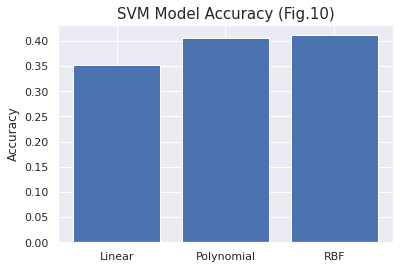

In [107]:
# bar chart of best SVM model
plt.bar([0, 1, 2], best_scores)
plt.xticks([0, 1, 2], ['Linear', 'Polynomial','RBF'])
plt.ylabel('Accuracy')
plt.title('SVM Model Accuracy (Fig.10)',fontsize='15')

plt.show()